In [4]:
import pandas as pd
import scipy.stats as stats
import numpy as np

%matplotlib inline
import seaborn as sns

Import 12 weeks data

In [5]:
#Download MTA turnstile data fles for 12 weeks (12/11/21 - 2/26/22)
# Source: http://web.mta.info/developers/turnstile.html

week_nums=[220226, 220219, 220212, 220205, 220129, 220122, 220115, 220108, 220101, 211225, 211218, 211211]
url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
dfs = []
for week_num in week_nums:
    file_url = url.format(week_num)
    dfs.append(pd.read_csv(file_url))
df = pd.concat(dfs)    

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520777 entries, 0 to 210440
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [8]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
df.columns=[column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
import datetime

In [11]:
df['date-time'] = pd.to_datetime(df.DATE + ' ' +df.TIME)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date-time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548,2022-02-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566,2022-02-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666,2022-02-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749,2022-02-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805,2022-02-19 19:00:00


In [12]:
# drop duplicate entry
df.drop_duplicates(subset=['C/A', 'UNIT', 'SCP','STATION', 'date-time'], inplace=True)
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date-time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548,2022-02-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566,2022-02-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666,2022-02-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749,2022-02-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805,2022-02-19 19:00:00


In [13]:
# Drop Exits and Desc Column
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date-time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,7688079,2022-02-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,7688081,2022-02-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,7688102,2022-02-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,7688138,2022-02-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,7688207,2022-02-19 19:00:00


In [14]:
df.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'date-time'],inplace=True, ascending=False)
#maximum entries is at the top of each group since rows are listed in descending order
df_daily = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index=False).ENTRIES.first())
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817


In [15]:
#calculate daily entries
df_daily[['PREV_DAY', 'PREV_ENTRIES']] = (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE', 'ENTRIES'].apply(lambda grp: grp.shift(1)))

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/1945656442.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[['PREV_DAY', 'PREV_ENTRIES']] = (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DATE', 'ENTRIES'].apply(lambda grp: grp.shift(1)))


In [16]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DAY,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0


In [17]:
#reverse counting at some turnstiles

In [18]:
df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DAY,PREV_ENTRIES
56,A002,R051,02-00-00,59 ST,12/04/2021,7668849,02/25/2022,7689726.0
140,A002,R051,02-00-01,59 ST,12/04/2021,6781865,02/25/2022,6803059.0
224,A002,R051,02-03-00,59 ST,12/04/2021,1472195,02/25/2022,1487250.0
308,A002,R051,02-03-01,59 ST,12/04/2021,1697939,02/25/2022,1736907.0
392,A002,R051,02-03-02,59 ST,12/04/2021,114025,02/25/2022,148251.0


In [19]:
(df_daily[df_daily['ENTRIES'] < df_daily['PREV_ENTRIES']].groupby(['C/A', 'UNIT', 'SCP', 'STATION']).size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    1
             00-05-01  RIT-ROOSEVELT    1
Length: 4731, dtype: int64

In [20]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0: # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter: # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter: # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

846 7354911.0
7299193 44191.0
5596063 7802.0
6 5597786.0
327680 67108864.0
67108864 327680.0
11 3622304.0
3615263 387.0
41 1562955740.0
1562966934 315.0
180 2900739.0
2885339 881.0
150995359 393436.0
393217 150995430.0
186 4211788.0
4197679 11887.0
119 5962569.0
5937012 22956.0
148 1511353.0
1511306 154.0
417687 100707125.0
100704922 418210.0
20 2645432.0
2635176 10668.0
636 5808834.0
5729388 4321.0
5 1940653.0
1937520 5904.0
301 1191891.0
1170316 26839.0
442 3433215.0
3414065 20807.0
10676745 30275.0
305 10685559.0
479 2506257.0
2479327 50347.0
22 1289819897.0
1289818770 167.0
1048912 9753966.0
9738515 1056569.0
17643454 61651.0
461 17674906.0
25667 4283553.0
4278402 25672.0
1996226557 478671.0
461939 1996209474.0
203 2037287.0
2016784 18142.0
311403 1781420.0
1775501 320484.0
81 6132683.0
6122984 10438.0
306 13962499.0
13946164 19914.0
2030107008 7958143.0
7934625 2030127064.0
1106890 285294362.0
285245004 1127213.0
21943784 117940.0
374 21944736.0
1594098493 73352962.0
73326284 1594

In [21]:
df_daily.dropna(subset=["PREV_DAY"], axis=0, inplace=True) #dropping the first day entry (no daily entry)
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DAY,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0,118.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0,244.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0,256.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0,263.0
5,A002,R051,02-00-00,59 ST,01/06/2022,7677090,01/05/2022,7676817.0,273.0


In [22]:
#by C/A, Area, Unit, Station combo
# unit_station_daily = df_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
# unit_station_daily.head()

In [23]:
#by station
station_daily = df_daily.groupby(['STATION', 'DATE'])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2022,3701.0
1,1 AV,01/03/2022,6844.0
2,1 AV,01/04/2022,7041.0
3,1 AV,01/05/2022,7354.0
4,1 AV,01/06/2022,7601.0


In [24]:
#total_by_station
station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
station_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATION        378 non-null    object 
 1   DAILY_ENTRIES  378 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [25]:
# stations with most traffice
station_totals.head(10)

,STATION,DAILY_ENTRIES
0,86 ST,7630332.0
1,34 ST-PENN STA,6956093.0
2,GRD CNTRL-42 ST,6780794.0
3,34 ST-HERALD SQ,5581561.0
4,PATH NEW WTC,5132226.0
5,23 ST,4952168.0
6,42 ST-PORT AUTH,4925856.0
7,59 ST COLUMBUS,4645526.0
8,FULTON ST,4635011.0
9,JKSN HT-ROOSVLT,4501307.0


In [26]:
#sort by station name
station_totals = station_totals.sort_values('STATION').reset_index()
station_totals.head()

,index,STATION,DAILY_ENTRIES
0,21,1 AV,2976344.0
1,47,103 ST,1829650.0
2,55,103 ST-CORONA,1643225.0
3,276,104 ST,305944.0
4,143,110 ST,703308.0


In [27]:
# loading the (modified) station location data
sta_location = pd.read_csv('station_list_copy.csv')
sta_location = sta_location.drop('Unnamed: 0',1)
sta_location.head()

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/3337354311.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sta_location = sta_location.drop('Unnamed: 0',1)


,Station Name,Station Latitude,Station Longitude
0,1 Av,40.730953,-73.981628
1,103 St,40.784001,-73.935003
2,104 St,40.695178,-73.844330
3,104 St-Oxfo Av,40.681711,-73.837683
4,110 St,40.795020,-73.944250


In [28]:
sta_location.info

<bound method DataFrame.info of         Station Name  Station Latitude  Station Longitude
0               1 Av         40.730953         -73.981628
1             103 St         40.784001         -73.935003
2             104 St         40.695178         -73.844330
3     104 St-Oxfo Av         40.681711         -73.837683
4             110 St         40.795020         -73.944250
..               ...               ...                ...
368      72 st-2 ave               NaN                NaN
369      57 st-7 ave               NaN                NaN
370  Crown hts-utica               NaN                NaN
371     Grove street               NaN                NaN
372         Harrison               NaN                NaN

[373 rows x 3 columns]>

In [29]:
# upper case for Station Name
sta_location['Station Name'] = sta_location['Station Name'].str.upper()
# finding NaN 
sta_location[sta_location['Station Latitude'].isnull()]

,Station Name,Station Latitude,Station Longitude
366,WTC-CORTLANDT,NaN,NaN
367,103 ST-CORONA,NaN,NaN
368,72 ST-2 AVE,NaN,NaN
369,57 ST-7 AVE,NaN,NaN
370,CROWN HTS-UTICA,NaN,NaN
371,GROVE STREET,NaN,NaN
372,HARRISON,NaN,NaN


In [30]:
# merge station total and station location
df_combined = pd.merge(station_totals, sta_location, how='left',left_on='STATION', right_on='Station Name')
df_combined.head()
# df_combined = df_combined.drop(['index','level_0'], 1)

,index,STATION,DAILY_ENTRIES,Station Name,Station Latitude,Station Longitude
0,21,1 AV,2976344.0,1 AV,40.730953,-73.981628
1,47,103 ST,1829650.0,103 ST,40.784001,-73.935003
2,55,103 ST-CORONA,1643225.0,103 ST-CORONA,NaN,NaN
3,276,104 ST,305944.0,104 ST,40.695178,-73.844330
4,143,110 ST,703308.0,110 ST,40.795020,-73.944250


In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              378 non-null    int64  
 1   STATION            378 non-null    object 
 2   DAILY_ENTRIES      378 non-null    float64
 3   Station Name       306 non-null    object 
 4   Station Latitude   300 non-null    float64
 5   Station Longitude  300 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 20.7+ KB


In [32]:
# find stations missing lat/lon
find_nan = df_combined[df_combined['Station Latitude'].isnull()]
find_nan.info()
# there are 78 stations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 2 to 375
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              78 non-null     int64  
 1   STATION            78 non-null     object 
 2   DAILY_ENTRIES      78 non-null     float64
 3   Station Name       6 non-null      object 
 4   Station Latitude   0 non-null      float64
 5   Station Longitude  0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.3+ KB


In [33]:
import geopy

In [34]:
#adding zipcode from lat/lon
from geopy.geocoders import Photon

def get_zipcode(df, geolocator, lat_field, lon_field):
    try:
        location = geolocator.reverse((df[lat_field], df[lon_field]))
        return location.raw['properties']['postcode']
    except (AttributeError, KeyError, ValueError):
        return None
geolocator = geopy.Photon(user_agent='myGeocoder')    

df_combined['zipcode'] = df_combined.apply(get_zipcode, axis=1, geolocator=geolocator,lat_field = 'Station Latitude', lon_field = 'Station Longitude')

In [35]:
df_combined.head()

,index,STATION,DAILY_ENTRIES,Station Name,Station Latitude,Station Longitude,zipcode
0,21,1 AV,2976344.0,1 AV,40.730953,-73.981628,10009
1,47,103 ST,1829650.0,103 ST,40.784001,-73.935003,10029-6408
2,55,103 ST-CORONA,1643225.0,103 ST-CORONA,NaN,NaN,None
3,276,104 ST,305944.0,104 ST,40.695178,-73.844330,11418
4,143,110 ST,703308.0,110 ST,40.795020,-73.944250,10029


In [36]:
#keeping just 5 digits for zipcode
df_combined['zipcode'] =  df_combined['zipcode'].str[:5]
df_combined.head()

,index,STATION,DAILY_ENTRIES,Station Name,Station Latitude,Station Longitude,zipcode
0,21,1 AV,2976344.0,1 AV,40.730953,-73.981628,10009
1,47,103 ST,1829650.0,103 ST,40.784001,-73.935003,10029
2,55,103 ST-CORONA,1643225.0,103 ST-CORONA,NaN,NaN,None
3,276,104 ST,305944.0,104 ST,40.695178,-73.844330,11418
4,143,110 ST,703308.0,110 ST,40.795020,-73.944250,10029


In [37]:
df_combined.columns

Index(['index', 'STATION', 'DAILY_ENTRIES', 'Station Name', 'Station Latitude',
       'Station Longitude', 'zipcode'],
      dtype='object')

In [38]:
# stations missing zipcode
df_combined[df_combined['zipcode'].isnull()].info
# there are 82
df_combined[df_combined['zipcode'].isnull()].sort_values('DAILY_ENTRIES', ascending=False).head(20)

,index,STATION,DAILY_ENTRIES,Station Name,Station Latitude,Station Longitude,zipcode
110,0,86 ST,7630332.0,86 ST,40.713882,-73.981470,None
230,43,GRAND ST,1884034.0,GRAND ST,40.715096,-73.967211,None
375,53,WTC-CORTLANDT,1668776.0,WTC-CORTLANDT,NaN,NaN,None
2,55,103 ST-CORONA,1643225.0,103 ST-CORONA,NaN,NaN,None
98,56,72 ST-2 AVE,1626484.0,72 ST-2 AVE,NaN,NaN,None
84,58,57 ST-7 AV,1596253.0,NaN,NaN,NaN,None
196,59,CROWN HTS-UTICA,1582240.0,CROWN HTS-UTICA,NaN,NaN,None
235,68,GROVE STREET,1391456.0,GROVE STREET,NaN,NaN,None
239,74,HARRISON,1307336.0,HARRISON,NaN,NaN,None
103,77,79 ST,1278256.0,79 ST,40.698718,-73.990264,None


In [39]:
#find None for zipcode
df_combined.loc[110, 'zipcode'] = '10028'
df_combined.loc[230, 'zipcode'] = '10002'
df_combined.loc[375, 'zipcode'] = '10006'
df_combined.loc[2, 'zipcode'] = '11368'
df_combined.loc[98, 'zipcode'] = '10021'
df_combined.loc[84, 'zipcode'] = '10106'
df_combined.loc[196, 'zipcode'] = '11213'
df_combined.loc[235, 'zipcode'] = '07302'
df_combined.loc[239, 'zipcode'] = '10013'
df_combined.loc[103, 'zipcode'] = '10024'
df_combined.loc[111, 'zipcode'] = '10028'
df_combined.loc[55, 'zipcode'] = '10455'
df_combined.loc[307, 'zipcode'] = '11216'
df_combined.loc[289, 'zipcode'] = '11237'
df_combined.loc[242, 'zipcode'] = '10014'
df_combined.loc[225, 'zipcode'] = '11218'
df_combined.loc[256, 'zipcode'] = '11430'
df_combined.loc[60, 'zipcode'] = '10001'

df_combined.loc[135, 'zipcode'] = '10012'
df_combined.loc[17, 'zipcode'] = '10011'
df_combined.loc[124, 'zipcode'] = '11105'
#df_combined.loc[184, 'zipcode'] = ''
df_combined.loc[182, 'zipcode'] = '10014'
df_combined.loc[316, 'zipcode'] = '07310'
df_combined.loc[190, 'zipcode'] = '11224'
df_combined.loc[76, 'zipcode'] = '10022'
df_combined.loc[318, 'zipcode'] = '10462'
df_combined.loc[247, 'zipcode'] = '10474'
#df_combined.loc[301, 'zipcode'] = ''
df_combined.loc[374, 'zipcode'] = '10007'
df_combined.loc[122, 'zipcode'] = '10003'
df_combined.loc[117, 'zipcode'] = '10011'
df_combined.loc[42, 'zipcode'] = '11101'

df_combined.loc[303, 'zipcode'] = '11226'
df_combined.loc[77, 'zipcode'] = '10022'
df_combined.loc[66, 'zipcode'] = '11104'
df_combined.loc[129, 'zipcode'] = '11230'
df_combined.loc[343, 'zipcode'] = '10301'
df_combined.loc[123, 'zipcode'] = '11102'
df_combined.loc[130, 'zipcode'] = '11230'
df_combined.loc[134, 'zipcode'] = '11223'
df_combined.loc[74, 'zipcode'] = '11215'

df_combined.loc[309, 'zipcode'] = '11419'
df_combined.loc[54, 'zipcode'] = '10454'
df_combined.loc[302, 'zipcode'] = '11226'
df_combined.loc[333, 'zipcode'] = '10044'
df_combined.loc[58, 'zipcode'] = '11101'
df_combined.loc[315, 'zipcode'] = '10007'
df_combined.loc[179, 'zipcode'] = '10026'
df_combined.loc[349, 'zipcode'] = '11212'
df_combined.loc[176, 'zipcode'] = '10462'
df_combined.loc[355, 'zipcode'] = '10010'
df_combined.loc[94, 'zipcode'] = '11377'
df_combined.loc[268, 'zipcode'] = '07042'

df_combined.loc[366, 'zipcode'] = '10460'
df_combined.loc[80, 'zipcode'] = '11377'
df_combined.loc[62, 'zipcode'] = '11106'
df_combined.loc[194, 'zipcode'] = '11101'
df_combined.loc[139, 'zipcode'] = '11209'
#df_combined.loc[328, 'zipcode'] = ''
#df_combined.loc[299, 'zipcode'] = ''
df_combined.loc[329, 'zipcode'] = '10044'
df_combined.loc[18, 'zipcode'] = '11215'
df_combined.loc[208, 'zipcode'] = '10466'
df_combined.loc[295, 'zipcode'] = '11208'
df_combined.loc[109, 'zipcode'] = '11421'
df_combined.loc[99, 'zipcode'] = '11372'
df_combined.loc[101, 'zipcode'] = '11421'
df_combined.loc[209, 'zipcode'] = '11238'
df_combined.loc[153, 'zipcode'] = '11226'
df_combined.loc[293, 'zipcode'] = '10466'
df_combined.loc[140, 'zipcode'] = '10469'
df_combined.loc[127, 'zipcode'] = '11230'
df_combined.loc[360, 'zipcode'] = '11207'

df_combined.loc[131, 'zipcode'] = '11230'
#df_combined.loc[300, 'zipcode'] = ''
df_combined.loc[132, 'zipcode'] = '11223'
df_combined.loc[128, 'zipcode'] = '11230'
df_combined.loc[157, 'zipcode'] = '11225'
df_combined.loc[292, 'zipcode'] = '11224'
df_combined.loc[120, 'zipcode'] = '11417'
df_combined.loc[353, 'zipcode'] = '10304'

df_combined[df_combined['zipcode'].isnull()].sort_values('DAILY_ENTRIES', ascending=False).info

<bound method DataFrame.info of      index          STATION  DAILY_ENTRIES Station Name  Station Latitude  \
184    114       CITY / BUS       865038.0          NaN               NaN   
301    144  NEWARK HW BMEBE       702492.0          NaN               NaN   
328    261    RIT-MANHATTAN       335693.0          NaN               NaN   
299    263         NEWARK C       332556.0          NaN               NaN   
300    345     NEWARK HM HE       163470.0          NaN               NaN   

     Station Longitude zipcode  
184                NaN    None  
301                NaN    None  
328                NaN    None  
299                NaN    None  
300                NaN    None  >

In [40]:
df_combined.info()
# 5 missing zipcodes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              378 non-null    int64  
 1   STATION            378 non-null    object 
 2   DAILY_ENTRIES      378 non-null    float64
 3   Station Name       306 non-null    object 
 4   Station Latitude   300 non-null    float64
 5   Station Longitude  300 non-null    float64
 6   zipcode            373 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 31.7+ KB


In [41]:
df_combined.head()
# data (station, daily entries, zipcode)

,index,STATION,DAILY_ENTRIES,Station Name,Station Latitude,Station Longitude,zipcode
0,21,1 AV,2976344.0,1 AV,40.730953,-73.981628,10009
1,47,103 ST,1829650.0,103 ST,40.784001,-73.935003,10029
2,55,103 ST-CORONA,1643225.0,103 ST-CORONA,NaN,NaN,11368
3,276,104 ST,305944.0,104 ST,40.695178,-73.844330,11418
4,143,110 ST,703308.0,110 ST,40.795020,-73.944250,10029


In [60]:
by_zipcode = df_combined.groupby('zipcode').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
by_zipcode = by_zipcode.drop(['index','Station Latitude', 'Station Longitude'], 1)
by_zipcode.head(20)  #Daily Entries by zipcode

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/1696927481.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by_zipcode = by_zipcode.drop(['index','Station Latitude', 'Station Longitude'], 1)


,zipcode,DAILY_ENTRIES
0,10019,19117474.0
1,10003,14269851.0
2,10001,9293919.0
3,10023,8949957.0
4,10028,8866594.0
5,11373,8488223.0
6,10002,7935105.0
7,11201,7400678.0
8,10120,6956093.0
9,11101,6892492.0


In [64]:
!pip install dataframe-image
import dataframe_image as dfi

  Using cached dataframe_image-0.1.1-py3-none-any.whl (32 kB)


In [43]:
by_zipcode.tail()

,zipcode,DAILY_ENTRIES
126,10470,335446.0
127,11692,269972.0
128,11417,130393.0
129,11693,87310.0
130,10304,47346.0


In [44]:
import matplotlib.pyplot as plt

In [45]:
highest20 = by_zipcode.iloc[:20]
lowest20 = by_zipcode.iloc[-20:]

In [65]:
dfi.export(highest20, 'highest20.png')

[0319/162245.144327:INFO:headless_shell.cc(659)] Written to file /var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/tmpv6wj8r52/temp.png.


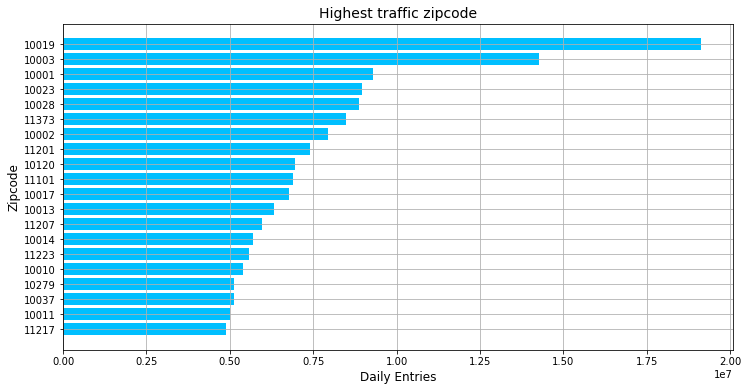

In [46]:
fig, ax = plt.subplots(figsize = (12,6))
ax.barh(highest20['zipcode'], highest20['DAILY_ENTRIES'], height=0.8, color = 'deepskyblue')
ax.set_title('Highest traffic zipcode', fontsize=14)
ax.set_ylabel('Zipcode', fontsize=12)
ax.set_xlabel('Daily Entries', fontsize=12)
#ax.bar_label(ax.containers[0], padding=3, fontweight = 'bold')
ax.grid(True)
plt.gca().invert_yaxis()
plt.savefig('highest_traffic_by_zipcode.png')
plt.show()

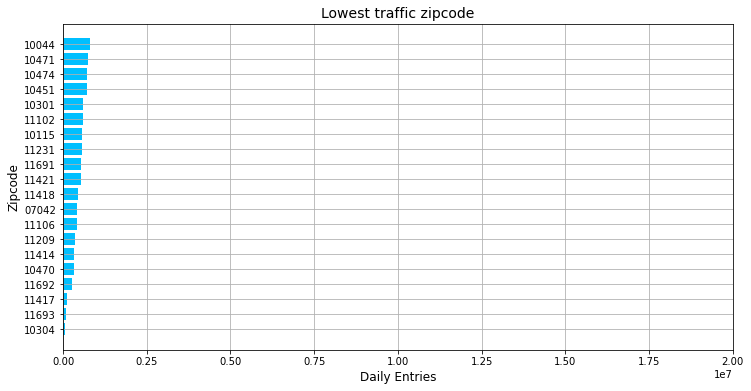

In [47]:
fig, ax = plt.subplots(figsize = (12,6))
ax.barh(lowest20['zipcode'], lowest20['DAILY_ENTRIES'], height=0.8, color = 'deepskyblue')
ax.set_title('Lowest traffic zipcode', fontsize=14)
ax.set_ylabel('Zipcode', fontsize=12)
ax.set_xlabel('Daily Entries', fontsize=12)
#ax.bar_label(ax.containers[0], padding=3, fontweight = 'bold')
ax.grid(True)
plt.xlim([0, 20000000])
plt.gca().invert_yaxis()
plt.savefig('lowest_traffic_by_zipcode.png')
plt.show()

In [48]:
# import number of vaccine sites by zip data
vacsitesByZip = pd.read_csv('vacsitesByZip.csv')
vacsitesByZip = vacsitesByZip.drop('Unnamed: 0',1)
vacsitesByZip.rename({'name':'site count'}, axis=1, inplace=True)
vacsitesByZip.head()

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/1559804089.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vacsitesByZip = vacsitesByZip.drop('Unnamed: 0',1)


,zipcode,site count
0,11101,5
1,11207,4
2,11201,3
3,11432,3
4,10457,3


In [49]:
vacsitesByZip['zipcode'] = vacsitesByZip['zipcode'].astype(str)

In [50]:
# merge by_zipcode with vaccine sites data
df_merged = pd.merge(by_zipcode, vacsitesByZip, how='left',left_on='zipcode', right_on='zipcode')

In [51]:
df_merged.head(20)

,zipcode,DAILY_ENTRIES,site count
0,10019,19117474.0,NaN
1,10003,14269851.0,NaN
2,10001,9293919.0,NaN
3,10023,8949957.0,NaN
4,10028,8866594.0,NaN
5,11373,8488223.0,2.0
6,10002,7935105.0,2.0
7,11201,7400678.0,3.0
8,10120,6956093.0,NaN
9,11101,6892492.0,5.0


In [52]:
highest20Merged = df_merged.iloc[:20]

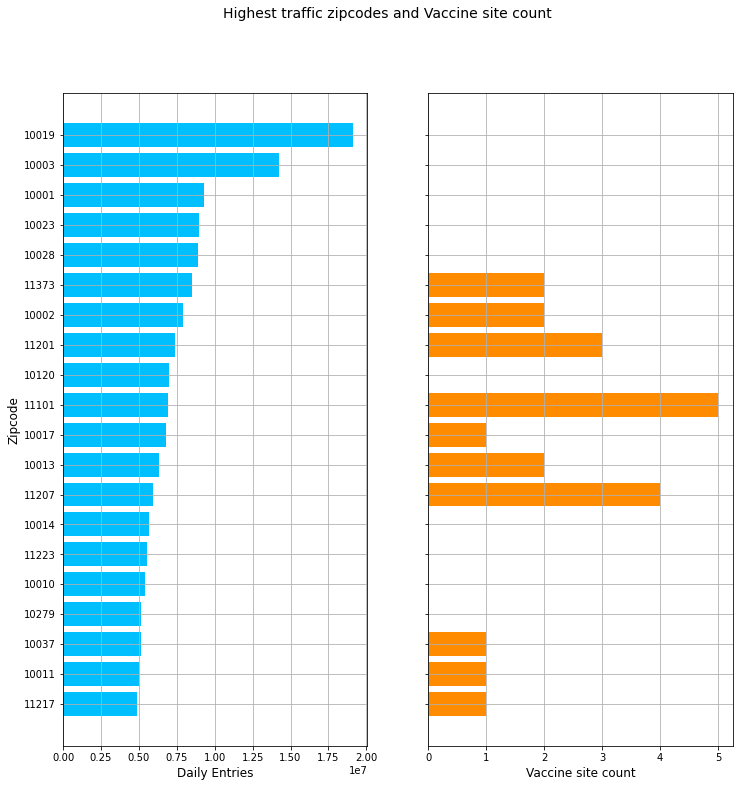

In [53]:
#plot 20 busiest zip code and number of vaccine sites
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize = (12,12))
ax1.barh(highest20Merged['zipcode'], highest20Merged['DAILY_ENTRIES'], height=0.8, color = 'deepskyblue')
ax2.barh(highest20Merged['zipcode'], highest20Merged['site count'], height=0.8, color = 'darkorange')
fig.suptitle('Highest traffic zipcodes and Vaccine site count', fontsize=14)
ax1.set_ylabel('Zipcode', fontsize=12)
ax1.set_xlabel('Daily Entries', fontsize=12)
ax2.set_xlabel('Vaccine site count', fontsize=12)
ax1.grid(True)
ax2.grid(True)
plt.gca().invert_yaxis()
plt.savefig('highest_traffic_vac_site.png')
plt.show()


In [59]:
# %pip install folium
import folium
import os

# %pip install geopandas
import geopandas as gpd

#load GeoJSON
geo_data_file=os.path.join('nyc-zip-code-tabulation-areas-polygons.geojson')

with open(geo_data_file, 'r') as jsonFile:
    geo_df=gpd.read_file(jsonFile)

geo_df = geo_df.rename(columns = {"CODE":"zipcode"})

my_map = folium.Map(location=[40.730610, -73.935242], zoom_start=11,
                   detect_retina=True, control_scale=False)

folium.Choropleth(
        geo_data=geo_df,
        name='choropleth',
        data=by_zipcode,
        columns=['zipcode','DAILY_ENTRIES'],
        key_on='feature.properties.postalCode',
        fill_color='OrRd',
        fill_opacity=0.7,
        line_opacity=0.95,
        line_color='Blue',
        legend_name='Daily Entries'
    ).add_to(my_map)

my_map

In [56]:
# Choropleth map showing number of vaccine sites at the Zip code level (with Folium)

#load GeoJSON
geo_data_file=os.path.join('nyc-zip-code-tabulation-areas-polygons.geojson')

with open(geo_data_file, 'r') as jsonFile:
    geo_df=gpd.read_file(jsonFile)

geo_df = geo_df.rename(columns = {"CODE":"zipcode"})

my_map = folium.Map(location=[40.730610, -73.935242], zoom_start=11,
                   detect_retina=True, control_scale=False)

folium.Choropleth(
        geo_data=geo_df,
        name='choropleth',
        data=vacsitesByZip,
        columns=['zipcode','site count'],
        key_on='feature.properties.postalCode',
        fill_color='OrRd',
        fill_opacity=0.7,
        line_opacity=0.95,
        line_color='Blue',
        legend_name='Site Count'
    ).add_to(my_map)

my_map

In [67]:
vac_zip = pd.read_csv('coverage-by-modzcta-adults.csv')
vac_zip.head()


,DATE,NEIGHBORHOOD_NAME,BOROUGH,MODZCTA,Label,AGE_GROUP,POP_DENOMINATOR,COUNT_PARTIALLY_CUMULATIVE,COUNT_FULLY_CUMULATIVE,COUNT_1PLUS_CUMULATIVE,COUNT_ADDITIONAL_CUMULATIVE,PERC_PARTIALLY,PERC_FULLY,PERC_1PLUS,PERC_ADDITIONAL
0,2022-03-17,Chelsea/NoMad/West Chelsea,Manhattan,10001,"10001, 10118",18+,25536.66,8261,30775,39036,13960,32.35,120.51,152.86,54.67
1,2022-03-17,Chinatown/Lower East Side,Manhattan,10002,10002,18+,63973.22,7426,61708,69134,37915,11.61,96.46,108.07,59.27
2,2022-03-17,East Village/Gramercy/Greenwich Village,Manhattan,10003,10003,18+,50398.54,6702,39051,45753,25089,13.30,77.48,90.78,49.78
3,2022-03-17,Financial District,Manhattan,10004,10004,18+,2684.95,720,3625,4345,1992,26.82,135.01,161.83,74.19
4,2022-03-17,Financial District,Manhattan,10005,10005,18+,8169.56,1543,7973,9516,4500,18.89,97.59,116.48,55.08


In [71]:
vac_zip['MODZCTA'] = vac_zip['MODZCTA'].astype(str)

In [68]:
df_merged.head()

,zipcode,DAILY_ENTRIES,site count
0,10019,19117474.0,NaN
1,10003,14269851.0,NaN
2,10001,9293919.0,NaN
3,10023,8949957.0,NaN
4,10028,8866594.0,NaN


In [74]:
df_withVacRate = pd.merge(df_merged, vac_zip[['MODZCTA','PERC_FULLY']], how='left', left_on='zipcode', right_on='MODZCTA')
df_withVacRate.head(20)

,zipcode,DAILY_ENTRIES,site count,MODZCTA,PERC_FULLY
0,10019,19117474.0,NaN,10019,116.21
1,10003,14269851.0,NaN,10003,77.48
2,10001,9293919.0,NaN,10001,120.51
3,10023,8949957.0,NaN,10023,90.97
4,10028,8866594.0,NaN,10028,82.49
5,11373,8488223.0,2.0,11373,115.08
6,10002,7935105.0,2.0,10002,96.46
7,11201,7400678.0,3.0,11201,95.92
8,10120,6956093.0,NaN,NaN,NaN
9,11101,6892492.0,5.0,11101,120.38


In [75]:
# Updaing max vac rate to 100% where it exceeds 100
mask = (df_withVacRate['PERC_FULLY'] > 100)
df_withVacRate['PERC_FULLY'][mask] = 100

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/3273600634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withVacRate['PERC_FULLY'][mask] = 100


In [79]:
df_withVacRate.head(20)

,zipcode,DAILY_ENTRIES,site count,MODZCTA,PERC_FULLY
0,10019,19117474.0,NaN,10019,100.00
1,10003,14269851.0,NaN,10003,77.48
2,10001,9293919.0,NaN,10001,100.00
3,10023,8949957.0,NaN,10023,90.97
4,10028,8866594.0,NaN,10028,82.49
5,11373,8488223.0,2.0,11373,100.00
6,10002,7935105.0,2.0,10002,96.46
7,11201,7400678.0,3.0,11201,95.92
8,10120,6956093.0,NaN,NaN,NaN
9,11101,6892492.0,5.0,11101,100.00


In [107]:
df_withVacRate.tail(20)
df_withVacRate['size'] = df_withVacRate['site count']
mask = df_withVacRate['site count'].isnull()
df_withVacRate['size'][mask] = 0.2
df_withVacRate1 = df_withVacRate.dropna(subset =['PERC_FULLY'])
df_withVacRate.rename(columns = {'DAILY_ENTRIES': 'TOTAL ENTRY', 'PERC_FULLY': 'VAC RATE'}, inplace=True)
df_withVacRate.head()

/var/folders/t2/ltmpj6dd57z4g5kjxrc1d05h0000gn/T/ipykernel_82422/246530043.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,zipcode,TOTAL ENTRY,site count,MODZCTA,VAC RATE,size
0,10019,19117474.0,NaN,10019,100.00,0.2
1,10003,14269851.0,NaN,10003,77.48,0.2
2,10001,9293919.0,NaN,10001,100.00,0.2
3,10023,8949957.0,NaN,10023,90.97,0.2
4,10028,8866594.0,NaN,10028,82.49,0.2


In [81]:
import plotly.express as px

In [118]:
fig = px.scatter(df_withVacRate, x="VAC RATE", y = 'TOTAL ENTRY', size ='size', size_max=50, color = 'size', 
                 title = "TRAFFIC VS VACCINATION RATES",
                trendline='ols', trendline_scope='overall', trendline_options=dict(log_x=True))
fig.update_xaxes(range=[60, 105])
fig.show()



In [119]:
# last 7 day data
last7 = pd.read_csv('last7days-by-modzcta.csv')
last7.head()


,modzcta,modzcta_name,label,lat,lon,percentpositivity_7day,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange
0,10001,Chelsea/NoMad/West Chelsea,"10001, 10118",40.750693,-73.997137,2.41,1370,33,901.7,Yes,March 13-March 19
1,10002,Chinatown/Lower East Side,10002,40.715781,-73.986176,2.53,1980,50,414.2,Yes,March 13-March 19
2,10003,East Village/Gramercy/Greenwich Village,10003,40.731825,-73.989164,3.69,1681,62,528.0,Yes,March 13-March 19
3,10004,Financial District,10004,40.703675,-74.013106,3.39,177,6,942.1,Yes,March 13-March 19
4,10005,Financial District,10005,40.706092,-74.008861,3.06,359,11,742.2,Yes,March 13-March 19


In [121]:
last7['modzcta'] = last7['modzcta'].astype(str)
last7.head()

,modzcta,modzcta_name,label,lat,lon,percentpositivity_7day,people_tested,people_positive,median_daily_test_rate,adequately_tested,daterange
0,10001,Chelsea/NoMad/West Chelsea,"10001, 10118",40.750693,-73.997137,2.41,1370,33,901.7,Yes,March 13-March 19
1,10002,Chinatown/Lower East Side,10002,40.715781,-73.986176,2.53,1980,50,414.2,Yes,March 13-March 19
2,10003,East Village/Gramercy/Greenwich Village,10003,40.731825,-73.989164,3.69,1681,62,528.0,Yes,March 13-March 19
3,10004,Financial District,10004,40.703675,-74.013106,3.39,177,6,942.1,Yes,March 13-March 19
4,10005,Financial District,10005,40.706092,-74.008861,3.06,359,11,742.2,Yes,March 13-March 19


In [122]:
dfWithLast7 = pd.merge(df_withVacRate, last7[['modzcta','percentpositivity_7day', 'people_positive']], how='left', left_on='zipcode', right_on='modzcta')
dfWithLast7.head(20)

,zipcode,TOTAL ENTRY,site count,MODZCTA,VAC RATE,size,modzcta,percentpositivity_7day,people_positive
0,10019,19117474.0,NaN,10019,100.00,0.2,10019,2.78,56.0
1,10003,14269851.0,NaN,10003,77.48,0.2,10003,3.69,62.0
2,10001,9293919.0,NaN,10001,100.00,0.2,10001,2.41,33.0
3,10023,8949957.0,NaN,10023,90.97,0.2,10023,2.90,69.0
4,10028,8866594.0,NaN,10028,82.49,0.2,10028,2.63,35.0
5,11373,8488223.0,2.0,11373,100.00,2.0,11373,1.28,28.0
6,10002,7935105.0,2.0,10002,96.46,2.0,10002,2.53,50.0
7,11201,7400678.0,3.0,11201,95.92,3.0,11201,4.01,91.0
8,10120,6956093.0,NaN,NaN,NaN,0.2,NaN,NaN,NaN
9,11101,6892492.0,5.0,11101,100.00,5.0,11101,1.86,32.0


In [124]:
fig = px.scatter(dfWithLast7, x="percentpositivity_7day", y = 'TOTAL ENTRY', 
                 title = "TRAFFIC VS PERCENT POSITIVE",
                trendline='ols', trendline_scope='overall', trendline_options=dict(log_x=True))
fig.show()


In [125]:
fig = px.scatter(dfWithLast7, x="people_positive", y = 'TOTAL ENTRY', 
                 title = "TRAFFIC VS POSITIVE CASES",
                trendline='ols', trendline_scope='overall', trendline_options=dict(log_x=True))
fig.show()


In [126]:
fig = px.scatter(dfWithLast7, x="size", y = 'TOTAL ENTRY', 
                 title = "TRAFFIC VS VAC SITES",
                trendline='ols', trendline_scope='overall', trendline_options=dict(log_x=True))
fig.show()
